# 시나리오

- 마켓에서 생선을 판매한다.
- 물류센터에서 신선한 생선을 직배송
- 물류센터 직원이 생선을 분류해야 된다.
- 이를 위해 분류기를 구현하고자 한다.


### 생선을 어떤 기준으로 분류할 수 있을까?
- 생선 분류를 위해 특징을 알아야 한다.
- 도미는 길이가 30cm이상이라고 한다.

In [2]:
# 생선의 길이가 30cm이상이면 도미로 분류하는 프로그램
fish_length = int(input('생선 길이:'))
if fish_length >= 30:
    print('도미')

도미


### 위 프로그램의 문제점?
- 생선 길이가 30cm이상이라고 무조건 도미인가?

### 이러한 문제를 해결하기 위해 생각해보기
- 일반적인 프로그램은 정해준 기준대로 동작
- 머신러닝은 학습을 통해 기준을 만들어 동작
- 여러 개의 도미 생선의 정보를 학습시켜 도미를 구분할 기준을 선정하도록 함
- 학습을 위한 데이터를 수집
    - 직접 도미들의 길이와 무게를 측정
    - 도미와 구분을 위해 빙어를 추가로 측정
    - 측정한 데이터를 준비하여 진행
    
#### 학습을 위한 데이터가 필요하며 이를 위해 데이터 수집을 해야 함

#### 도미 데이터 준비
- 수집한 데이터는 도미의 길이와 무게
- 각각을 특성(feature)이라고 함

In [3]:
# 수집된 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#### 시각화하기
- 데이터를 파악하기 위해 그래프를 활용할 수 있음
- matplotlib 라이브러리 활용
- 산점도(scatter)그래프를 그려본다.

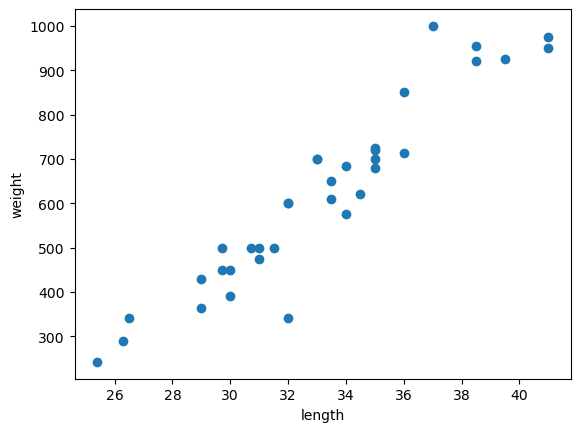

In [5]:
# 일반적으로 plt라는 별칭을 사용
import matplotlib.pyplot as plt
# 산점도 그래프에 데이터 설정
plt.scatter(bream_length, bream_weight)
# X축의 이름
plt.xlabel('length')
# Y축의 이름
plt.ylabel('weight')
# 그래프 그리기
plt.show()

- 위 그래프를 이용하여 알 수 있는 것은?
    - 생선의 길이가 길면 대체로 무게가 많이 나감
    - 위와 같은 형태를 선형(linear)적이다라고 말함

#### 빙어 데이터 준비

In [6]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 빙어 데이터 시각화

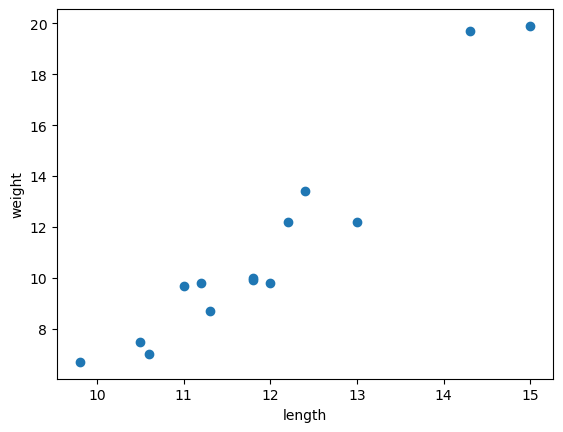

In [7]:
# 일반적으로 plt라는 별칭을 사용
import matplotlib.pyplot as plt
# 산점도 그래프에 빙어 데이터 설정
plt.scatter(smelt_length, smelt_weight)
# X축의 이름
plt.xlabel('length')
# Y축의 이름
plt.ylabel('weight')
# 그래프 그리기
plt.show()

- 위 그래프로 알 수 있는 것은?
    - 빙어도 길이에 따라 무게가 달라진다.
    - 도미에 비하면 그 차이가 미미하다.

#### 도미와 빙어 모두의 산점도 그리기

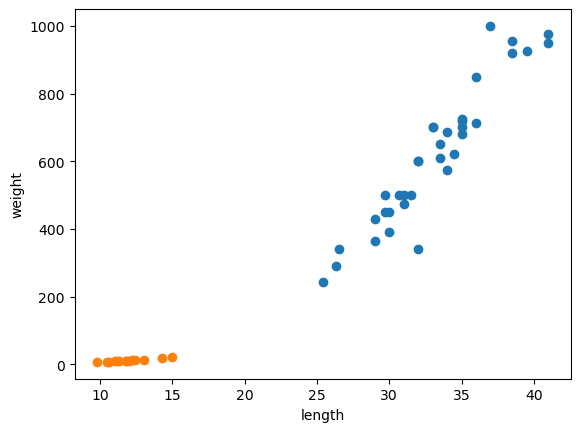

In [8]:
# 일반적으로 plt라는 별칭을 사용
import matplotlib.pyplot as plt
# 산점도 그래프에 도미 데이터 설정
plt.scatter(bream_length, bream_weight)
# 산점도 그래프에 빙어 데이터 설정
plt.scatter(smelt_length, smelt_weight)
# X축의 이름
plt.xlabel('length')
# Y축의 이름
plt.ylabel('weight')
# 그래프 그리기
plt.show()

- 위 그래프로 알 수 있는 것은?
- 빙어는 길이가 늘어나도 무게가 많이 늘어나지 않음
    (무게가 길이에 영향을 덜 받는 특성)

### 첫 번째 머신러닝 맛보기
- scikit-learn(사이킷런) 패키지 활용
- 사이킷런 패키지의 알고리즘들은 특성들을 2차원 형태로 만들어야 함
- kNN(k-Nearest Neighbors) : k-최근접 이웃 알고리즘으로 분류

In [9]:
# 도미와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l, w] for l,w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [10]:
# 각 길이와 무게에 따라 도미와 빙어를 분류한 정답을 생성
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
# 학습(훈련)하기
from sklearn.neighbors import KNeighborsClassifier
# kNN 모델 import
# 모델 인스턴스 생성
# 학습

KNeighborsClassifier()

In [35]:
# 모델 평가(0 ~ 1 사이의 값을 반환함)
# 정확도(accuracy)

1.0

### k-최근접 이웃 알고리즘 이해
- 다음 그래프에 표시된 마커가 어떤 생선인가?

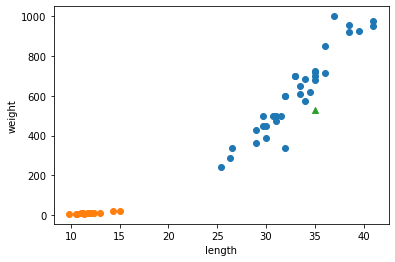

In [50]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
# 길이 35, 무게 530 마커 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [57]:
# 실체 분류 예측해보기
# 예측

array([1])

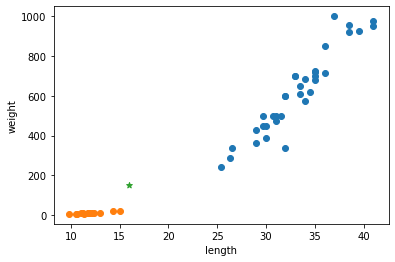

In [65]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
# 길이 16, 무게 150 마커 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
# 실체 분류 예측해보기
# 예측

array([0])

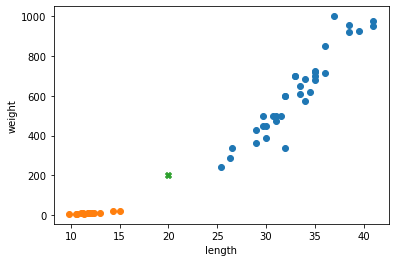

In [52]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
# 길이 20, 무게 200 마커 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [68]:
# 실체 분류 예측해보기
# 예측

array([1])

- kNN은 데이터를 모두 가지고 있다.
- 새로운 데이터가 직선거리로 어떤 데이터와 몇 개가 가까운지 파악(Default:5)

In [72]:
kn._fit_X # 모델이 저장하고 있는 데이터

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [75]:
kn._y # 모델이 가지고 있는 타겟 속성

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [76]:
# 49개의 이웃으로 분류하는 모델 인스턴스 생성
# 학습
# 정확도 확인

0.7142857142857143

- 5개의 이웃으로 분류하는 기존 모델 분류 결과

[1]
[0]
[1]


- 49개의 이웃으로 분류하는 모델은 모든 분류 결과가 도미가 됨

[1]
[1]
[1]


In [82]:
print(35/49) # 도미를 잘 맞출 확률(정확도)

0.7142857142857143


## 여기까지 개념 정리하기